 ### хи-квадрат

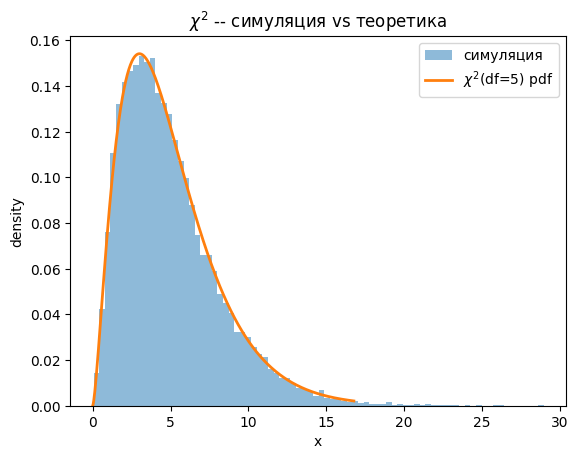

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

np.random.seed(0)
k = 5
B = 20000
# симулируем сумму квадратов k стандартных нормалей
chis = np.sum(np.random.normal(size=(B, k))**2, axis=1)

# гистограмма и теоретическая плотность
xs = np.linspace(0, np.percentile(chis, 99.5), 500)
plt.hist(chis, bins=80, density=True, alpha=0.5, label='симуляция')
plt.plot(xs, chi2.pdf(xs, df=k), label=f'$\chi^2$(df={k}) pdf', lw=2)
plt.legend(); plt.xlabel('x'); plt.ylabel('density'); plt.title('$\chi^2$ -- симуляция vs теоретика')
plt.show()

### Распределение Стьюдента

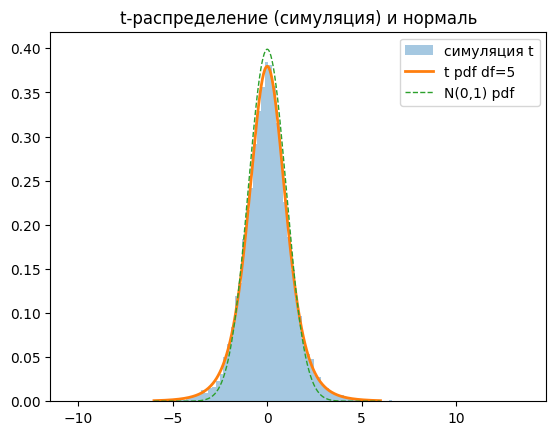

In [2]:
from scipy.stats import t, norm

np.random.seed(1)
df = 5
B = 20000
# симуляция t как ratio
z = np.random.normal(size=B)
chi = np.sum(np.random.normal(size=(B, df))**2, axis=1)
t_sim = z / np.sqrt(chi/df)

xs = np.linspace(-6, 6, 400)
plt.hist(t_sim, bins=120, density=True, alpha=0.4, label='симуляция t')
plt.plot(xs, t.pdf(xs, df), label=f't pdf df={df}', lw=2)
plt.plot(xs, norm.pdf(xs), label='N(0,1) pdf', lw=1, ls='--')
plt.legend(); plt.title('t-распределение (симуляция) и нормаль'); plt.show()

### Распределение Фишера

Рассмотрим симуляцию на Python и применение для теста равенства дисперсий:

In [3]:
from scipy.stats import f

np.random.seed(2)
n1, n2 = 30, 40
# симуляция нормальных выборок с разными дисперсиями
s1 = np.random.normal(loc=0, scale=1.2, size=n1)
s2 = np.random.normal(loc=0, scale=0.9, size=n2)

var1 = s1.var(ddof=1)
var2 = s2.var(ddof=1)
F_stat = var1 / var2
df1, df2 = n1-1, n2-1
p_upper = 1 - f.cdf(F_stat, df1, df2)
p_two_sided = 2 * min(p_upper, 1-p_upper)  # грубая двухсторонняя версия
print(f"F = {F_stat:.3f}, df1={df1}, df2={df2}, one-sided p = {p_upper:.4f}, approx two-sided p={p_two_sided:.4f}")

F = 1.625, df1=29, df2=39, one-sided p = 0.0782, approx two-sided p=0.1565


Упражнение 4

In [8]:
sigma = 2
mu = 0
n = 20
np.random.seed(19)
s1 = np.random.normal(mu, sigma, n) 
np.var(s1, ddof = 1)


np.float64(2.621312533316024)

Упражнение 2.5.

In [9]:
np.random.seed(251)
s_1 = np.random.normal(0, 1.5, 25) 
s_2 = np.random.normal(0, 1.0, 30) 
np.var(s_1, ddof = 1)/np.var(s_2, ddof = 1)

np.float64(2.031065726383414)